# Analisando meus dados da Netflix
### Quanto tempo passamos assistindo Netflix?

## 1. Contexto
O objetivo dessa análise é descobrir quanto tempo minha família e eu passamos assistindo Netflix.

Algumas perguntas que respoderei?
- **Quanto tempo passamos assistindo Netflix?**
- **Assistimos mais séries ou filmes?**
- **Quais séries ou filmes mais assistimos?**
- **Qual dia da semana mais assistimos?**
- **Qual hora do dia assistimos com mais frequência?**
 
> A inspiração veio do seguinte artigo do site Dataquest<br>
**Beginner Python Tutorial: Analyze Your Personal Netflix Data** ([link](https://www.dataquest.io/blog/python-tutorial-analyze-personal-netflix-data/))

### 1.1 TLDR

 - **Processamento**:
  - Github ([link](https://github.com/psartoro)). 
 - **Fonte**:
  - Get My Info Netflix: [link](https://netflix.com/account/getmyinfo)

### 1.2 Netflix

> Netflix é um serviço de streaming de filmes e séries, fundada em 1997 nos Estados Unidos, surgindo, inicialmente, como um serviço de entrega de DVDs pelo correio. A partir de 2007 começaram a expandir para o seviço de streaming nos EUA. Hoje está presente em mais de 190 países. Além de de filmes e séries de vários estúdios, produz seus próprios conteúdos. Fonte: [Wikipédia](https://pt.wikipedia.org/wiki/Netflix)

### 1.3 Dados

Os dados foram requisitados e baixados diretamente da Netflix. Para solicitar, é necessário estar logado na conta e acessar a página [Get My Info](https://netflix.com/account/getmyinfo) e clicar no botão que aparecerá. A Netflix enviará um e-mail de confirmação, no qual é necessário clicar para confirmar o pedido. O processo pode demorar de 24h a 30 dias. A Netflix enviará um e-mail para download dos dados.

Os dados:
- **Profile**: perfil da conta
- **Start Time**: data e hora em que se iniciou a visualização
- **Duration**: duração da visualização
- **Attributes**: atributos da visualização
- **Title**: título do silme/série
- **Supplemental Video Type**: tipo de vídeo suplementar
- **Device Type**: tipo do dispositivo
- **Bookmark**: marcação
- **Latest Bookmark**: última marcação
- **Country**: país

## 2. Extração e Transformação dos Dados

In [1]:
# bibliotecas
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('./CONTENT_INTERACTION/ViewingActivity.csv')
df = df.rename(columns={'Profile Name': 'Profile'})
df = df.query('Profile == "Pedro"')
df.head()

,Profile,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
15188,Pedro,2022-07-04 02:07:49,00:02:46,NaN,Supermães: Temporada 6: O grande (Episódio 4),NaN,Elsys SEI Robotics SEI103E Streaming Stick,00:03:34,00:03:34,BR (Brazil)
15189,Pedro,2022-07-04 01:43:06,00:20:30,NaN,"Supermães: Temporada 6: Adeus, Goldie (Episódi...",NaN,Elsys SEI Robotics SEI103E Streaming Stick,00:21:17,00:21:17,BR (Brazil)
15190,Pedro,2022-07-04 01:41:26,00:01:34,NaN,Supermães: Temporada 6: Lanche quente (Episódi...,NaN,Elsys SEI Robotics SEI103E Streaming Stick,00:21:14,00:21:14,BR (Brazil)
15191,Pedro,2022-07-04 01:18:45,00:19:19,Autoplayed: user action: User_Interaction;,Supermães: Temporada 6: Lanche quente (Episódi...,NaN,Elsys SEI Robotics SEI103E Streaming Stick,00:19:40,Not latest view,BR (Brazil)
15192,Pedro,2022-07-04 00:56:47,00:21:42,NaN,Supermães: Temporada 6: Hóspede (Episódio 1),NaN,Elsys SEI Robotics SEI103E Streaming Stick,00:21:19,00:21:19,BR (Brazil)


> A Netflix envia vários arquivos em várias pastas. `ViewingActivity.csv` é exatamente o arquivo que possui os dados de visualização. Nomeei a coluna `Profile Name` para apenas `Profile` e filtrei por meu perfil, pois esta conta possui mais de um perfil.

In [3]:
linhas, colunas = df.shape
print(f'Linhas: {linhas}\nColunas: {colunas}')

Linhas: 2670
Colunas: 10


> Dataset é grande, mais de 2000 linhas.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2670 entries, 15188 to 17857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Profile                  2670 non-null   object
 1   Start Time               2670 non-null   object
 2   Duration                 2670 non-null   object
 3   Attributes               1896 non-null   object
 4   Title                    2670 non-null   object
 5   Supplemental Video Type  678 non-null    object
 6   Device Type              2670 non-null   object
 7   Bookmark                 2670 non-null   object
 8   Latest Bookmark          2670 non-null   object
 9   Country                  2670 non-null   object
dtypes: object(10)
memory usage: 229.5+ KB


> Possui alguns dados nulos, mas não vou me preocupar por ora, pois ainda considerarei com quais colunas irei trabalhar. Os tipos estão todos como `object`, que são `strings`. Irei converter para os formatos corretos para possibilitar trabalhar com os cálculos que serão usados.

In [5]:
df = df[['Start Time', 'Duration', 'Title']]
df.rename(columns={
    'Start Time': 'start_time',
    'Duration': 'duration',
    'Title': 'title'
}, inplace = True)
df.head()

,start_time,duration,title
15188,2022-07-04 02:07:49,00:02:46,Supermães: Temporada 6: O grande (Episódio 4)
15189,2022-07-04 01:43:06,00:20:30,"Supermães: Temporada 6: Adeus, Goldie (Episódi..."
15190,2022-07-04 01:41:26,00:01:34,Supermães: Temporada 6: Lanche quente (Episódi...
15191,2022-07-04 01:18:45,00:19:19,Supermães: Temporada 6: Lanche quente (Episódi...
15192,2022-07-04 00:56:47,00:21:42,Supermães: Temporada 6: Hóspede (Episódio 1)


> Aqui filtrei apenas as colunas de interesse e as renomeei para melhor organização.

In [6]:
df.isnull().sum()

start_time    0
duration      0
title         0
dtype: int64

> Esse filtro não trouxe dados nulos, portanto, nenhum tratamento a ser feito por aqui.

In [7]:
df['start_time'] = pd.to_datetime(df['start_time'], utc=True)
df = df.set_index('start_time')
df.index = df.index.tz_convert('America/Sao_Paulo')
df = df.reset_index()
df['duration'] = pd.to_timedelta(df['duration'])
df.head()

,start_time,duration,title
0,2022-07-03 23:07:49-03:00,0 days 00:02:46,Supermães: Temporada 6: O grande (Episódio 4)
1,2022-07-03 22:43:06-03:00,0 days 00:20:30,"Supermães: Temporada 6: Adeus, Goldie (Episódi..."
2,2022-07-03 22:41:26-03:00,0 days 00:01:34,Supermães: Temporada 6: Lanche quente (Episódi...
3,2022-07-03 22:18:45-03:00,0 days 00:19:19,Supermães: Temporada 6: Lanche quente (Episódi...
4,2022-07-03 21:56:47-03:00,0 days 00:21:42,Supermães: Temporada 6: Hóspede (Episódio 1)


> Aqui converti as colunas da seguinte forma:
> - Converti `start_time` para `Datetime`, adicionando o parâmetro UTC para anexar fuso horário;
> - Converti o fuso horário para o nosso usando o `start_time`, passando como argumento a string do fuso horário local `America/Sao_Paulo`. Antes disso foi necessário setar `start_time` como index, para poder usar o `start_time`;
> - Após esse processo, resetei o index;
> - Converti a coluna `duration` para `to_timedelta`, que é uma medida de duração de tempo do pandas.

In [8]:
df.dtypes

start_time    datetime64[ns, America/Sao_Paulo]
duration                        timedelta64[ns]
title                                    object
dtype: object

> Vemos então como ficaram os tipos dos dados das colunas de interesse.

In [9]:
df[['name', 'season', 'episode']] = df['title'].str.split(':', 2, expand=True)
df.drop('title', axis=1, inplace=True)
df.head()

,start_time,duration,name,season,episode
0,2022-07-03 23:07:49-03:00,0 days 00:02:46,Supermães,Temporada 6,O grande (Episódio 4)
1,2022-07-03 22:43:06-03:00,0 days 00:20:30,Supermães,Temporada 6,"Adeus, Goldie (Episódio 3)"
2,2022-07-03 22:41:26-03:00,0 days 00:01:34,Supermães,Temporada 6,Lanche quente (Episódio 2)
3,2022-07-03 22:18:45-03:00,0 days 00:19:19,Supermães,Temporada 6,Lanche quente (Episódio 2)
4,2022-07-03 21:56:47-03:00,0 days 00:21:42,Supermães,Temporada 6,Hóspede (Episódio 1)


> O próximo tratamento que fiz foi "quebrar" a coluna `title` e criar novas colunas para separar o nome do programa, temporada e episódio. Após, deletei a coluna `title` que não mais será usada.

In [10]:
df = df[(df['duration'] > '0 days 00:02:00')]
df.head()

,start_time,duration,name,season,episode
0,2022-07-03 23:07:49-03:00,0 days 00:02:46,Supermães,Temporada 6,O grande (Episódio 4)
1,2022-07-03 22:43:06-03:00,0 days 00:20:30,Supermães,Temporada 6,"Adeus, Goldie (Episódio 3)"
3,2022-07-03 22:18:45-03:00,0 days 00:19:19,Supermães,Temporada 6,Lanche quente (Episódio 2)
4,2022-07-03 21:56:47-03:00,0 days 00:21:42,Supermães,Temporada 6,Hóspede (Episódio 1)
8,2022-07-03 02:40:11-03:00,0 days 00:09:25,Supermães,Temporada 5,Merd* (Episódio 10)


> Aplique um filtro no tempo de duração dos programas maiores que 2 minutos, para desconsiderar episódios e filmes assistidos parcialmente e aquela reprodução automática na página inicial.

In [11]:
df['weekday'] = df['start_time'].dt.weekday
df['hour'] = df['start_time'].dt.hour
df.head()

,start_time,duration,name,season,episode,weekday,hour
0,2022-07-03 23:07:49-03:00,0 days 00:02:46,Supermães,Temporada 6,O grande (Episódio 4),6,23
1,2022-07-03 22:43:06-03:00,0 days 00:20:30,Supermães,Temporada 6,"Adeus, Goldie (Episódio 3)",6,22
3,2022-07-03 22:18:45-03:00,0 days 00:19:19,Supermães,Temporada 6,Lanche quente (Episódio 2),6,22
4,2022-07-03 21:56:47-03:00,0 days 00:21:42,Supermães,Temporada 6,Hóspede (Episódio 1),6,21
8,2022-07-03 02:40:11-03:00,0 days 00:09:25,Supermães,Temporada 5,Merd* (Episódio 10),6,2


> Criei mais duas colunas, `weekday` para pegar o dia da semana, sendo de 0 a 6 (Seg a Dom) e `hour` para pegar a hora do dia. Com elas poderemos respoder uma das perguntas.

In [12]:
df['type'] = df['episode'].apply(lambda e: 'show' if (e is not None) else 'movie')
df.head()

,start_time,duration,name,season,episode,weekday,hour,type
0,2022-07-03 23:07:49-03:00,0 days 00:02:46,Supermães,Temporada 6,O grande (Episódio 4),6,23,show
1,2022-07-03 22:43:06-03:00,0 days 00:20:30,Supermães,Temporada 6,"Adeus, Goldie (Episódio 3)",6,22,show
3,2022-07-03 22:18:45-03:00,0 days 00:19:19,Supermães,Temporada 6,Lanche quente (Episódio 2),6,22,show
4,2022-07-03 21:56:47-03:00,0 days 00:21:42,Supermães,Temporada 6,Hóspede (Episódio 1),6,21,show
8,2022-07-03 02:40:11-03:00,0 days 00:09:25,Supermães,Temporada 5,Merd* (Episódio 10),6,2,show


> O último tratamento que fiz nos dados foi criar uma coluna `type`. Essa coluna define se o programa é um filme `movie` ou série `show`.

## 3. Analise Explortória
### Respondendo as perguntas

### 3.1 Quanto tempo passamos assistindo Netflix?

In [13]:
print(f'Tempo assisitindo: {df.duration.sum()}')

Tempo assisitindo: 31 days 04:25:55


> Passamos um total de 31 dias, 7 horas e 9 minutos assistindo Netflix. Com certeza, a maior parte esmagadora desse tempo foi assisito por minha esposa e filhos.

### 3.2 Assistimos mais séries ou filmes?

In [14]:
total_tipo_assistido = round((df.groupby('type').size()/df.shape[0])*100, 2)
total_tipo_assistido = total_tipo_assistido.reset_index()
total_tipo_assistido.columns = ['type', 'percent']
total_tipo_assistido = total_tipo_assistido.sort_values(by='percent', ascending=False)
total_tipo_assistido

,type,percent
1,show,88.69
0,movie,11.31


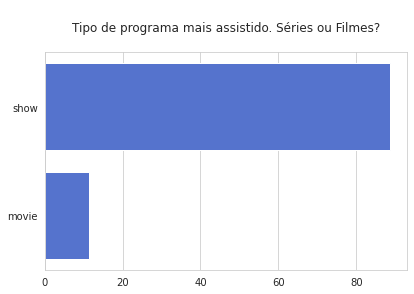

In [15]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(6.5, 4))
    ax = sns.barplot(x='percent',
                        y='type',
                        data=total_tipo_assistido,
                        orient='h',
                        color='#4169E1')
    ax.set(xlabel=None, ylabel=None)
    ax.set(title='\nTipo de programa mais assistido. Séries ou Filmes?\n')

> Mais de 80% dos programas assisitidos foram séries. Claramente uma preferência por esse gênero de show. Sendo assim, vou analisar somente o tipo show.

### 3.2 Quais séries ou filmes mais assistimos?

In [16]:
episodios = df.query('type == "show"')
episodios = episodios.groupby('name').count().sort_values(by='episode', ascending=False)['episode']
episodios = episodios.reset_index()
episodios.columns = ['name', 'count']
episodios.head(10)

,name,count
0,Patrulha Canina,180
1,Bob Esponja,101
2,Supermães,88
3,Peaky Blinders,84
4,Os Jovens Titãs em Ação,65
5,Better Call Saul,64
6,The Sinner,50
7,The Crown,42
8,As Telefonistas,42
9,Stranger Things,36


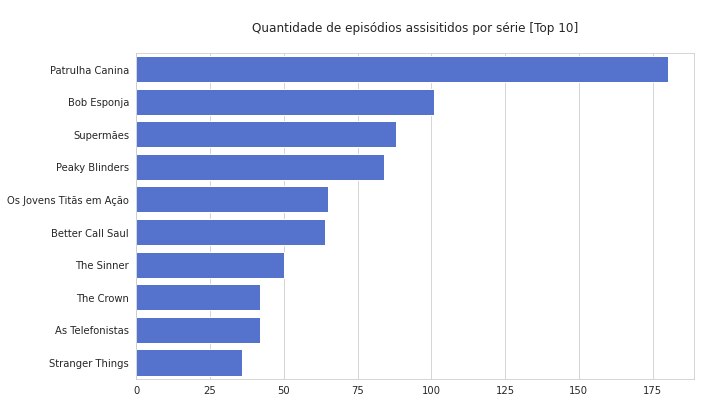

In [17]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax = sns.barplot(x='count',
                        y='name',
                        data=episodios.head(10),
                        orient='h',
                        color='#4169E1')
    ax.set(xlabel=None, ylabel=None)
    ax.set(title='\nQuantidade de episódios assisitidos por série [Top 10]\n')

> Posso considerar que meus filhos de 1 e 5 anos passam mais tempo assistindo Netflix que minha esposa e eu. Basta ver as duas séries mais assistidas. Devo considerar que algumas séries assistimos os episódios apenas uma vez. Não temos costume de assistir novamente algum episódio. Raramente fazemos isso. Mas meus filhos assistem repetidamente muitos episódios de suas séries. Também considero nessa lista séries que não assisitimos ainda a todos os episódios.

### 3.3 Qual dia da semana mais assistimos?

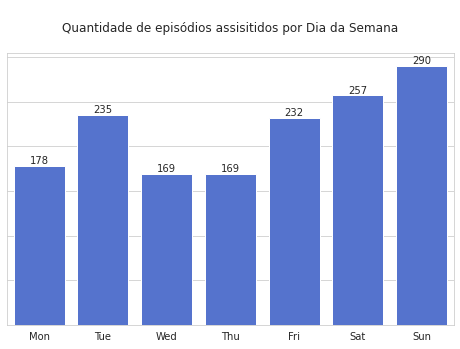

In [21]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(8, 5))
    ax = sns.countplot(x='weekday',
                          data=df,
                          color='#4169E1')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.0f}'.format(y), (x.mean(), y),
                ha='center', va='bottom')
    
    ax.set(xlabel=None, ylabel=None)
    ax.set(yticklabels=[])
    ax.set(xticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    ax.set(title='\nQuantidade de episódios assisitidos por Dia da Semana\n')

> Domingo é o dia em que mais assistimos Netflix, seguido de sábado terça e sexta bem atrás.

### 3.4 Qual hora do dia assistimos com mais frequência?

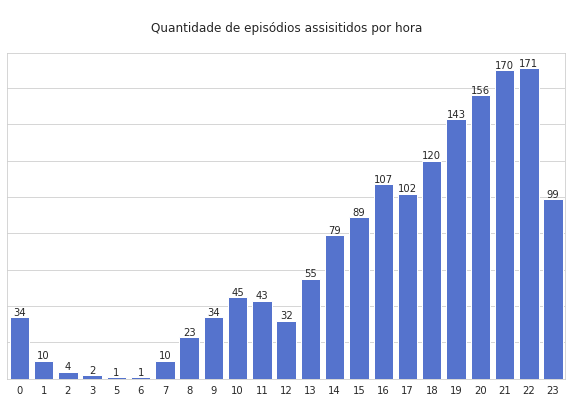

In [19]:
with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax = sns.countplot(x='hour',
                          data=df,
                          color='#4169E1')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.0f}'.format(y), (x.mean(), y),
                ha='center', va='bottom')
    
    ax.set(xlabel=None, ylabel=None)
    ax.set(yticklabels=[])
    ax.set(title='\nQuantidade de episódios assisitidos por hora\n')

> Entre 19h e 22h são os horários que mais assisitimos. Nesse horário as crianças começam a se preparar para dormir e minha esposa e eu assistimos tudo que podemos, pois é mais difícil em outros horários. Raramente assistimos das 0h as 6h. Quando meus filhos não estão na escola, o período de 7h as 12h estão assistindo algo. Minha esposa chega do trabalho as 13h, então isso explica o crescimento desse horário em diante.

# Contatos
- **LinkedIn**: https://www.linkedin.com/in/pedrosart/
- **Github**: https://github.com/psartoro
- **Email**: pedrosartoro9@gmail.com